<a href="https://colab.research.google.com/github/faiqfaqih15/latihan-phyton/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Penjelasan**

In [ ]:
# input library

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# membuat data random

np.random.seed(0)

In [ ]:
X,y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2, -3], [1,1]], cluster_std=0.9)

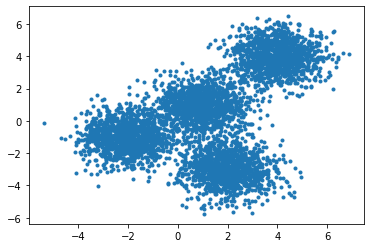

In [ ]:
plt.scatter(X[:, 0], X[:,1], marker='.')

In [ ]:
# set up K-Means

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [ ]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# membuat label

k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 3, 0, 0], dtype=int32)

In [ ]:
# pusat-pusat data
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822],
       [ 3.97334234,  3.98758687]])

In [ ]:
# Inisialisasi plot dengan dimensi 4
fig = plt.figure(figsize=(6, 4))

# Mewarnai dengan color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Membuat plot
ax = fig.add_subplot(1, 1, 1)

# Melakukan looping plot dengan data-data dan centeroidnya masing- masing.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
  my_members = (k_means_labels == k)
  cluster_center = k_means_cluster_centers[k]

  # plot data point dengan warna
  ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
  # plot centeroid dengan warna
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize = 6)

# nama plot
ax.set_title('cuma coba bos')
# hapus sumbu x dan y
ax.set_xticks(())
ax.set_yticks(())
plt.show()

SyntaxError: ignored

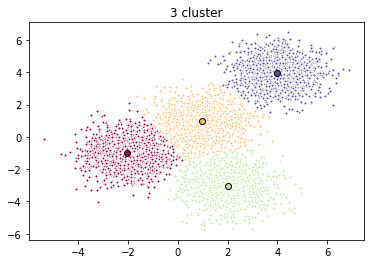

In [ ]:
# contoh 3 cluster

k_means3 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3_labels))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
  my_members = (k_means3_labels == k)
  cluster_center = k_means3_cluster_centers[k]
  ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
  ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)


ax.set_title('3 cluster')
plt.show()

### **Latihan**

In [4]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2021-07-26 10:32:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.01s   

2021-07-26 10:32:26 (2.73 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [5]:
# Load data

import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
# pre-processing

df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
import numpy as np
from sklearn.preprocessing import  StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline
clusternum = 3
k_means = KMeans(init = "k-means++", n_clusters =clusternum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
# Menentukan tabel setiap baris

df["clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [10]:
# Menentukan centeroid

df.groupby('clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


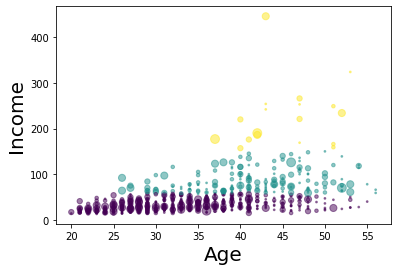

In [22]:
import matplotlib.pyplot as plt 
area = np.pi * (X[:, 1])** 2
plt.scatter(X[:, 0], X[:, 3], s= area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Income', fontsize=20)

plt.show()

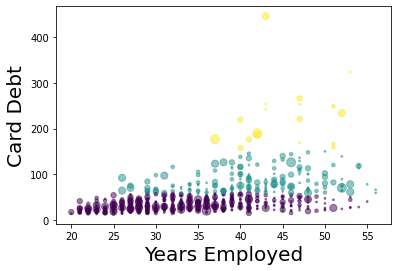

In [28]:
area = np.pi * (X[:, 1])** 2
plt.scatter(X[:, 0], X[:, 3], s= area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Years Employed', fontsize=20)
plt.ylabel('Card Debt', fontsize=20)

plt.show()

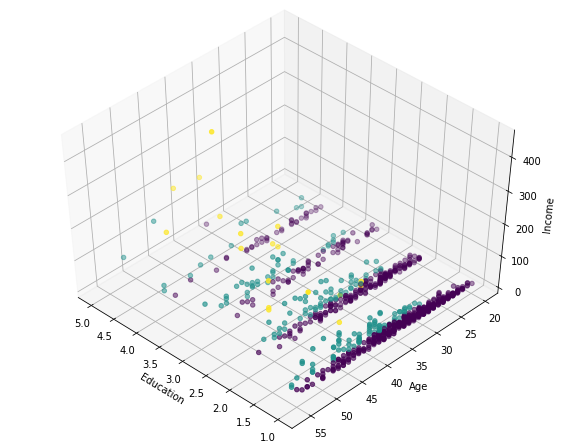

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:,1], X[:,0], X[:,3], c=labels.astype(np.float))

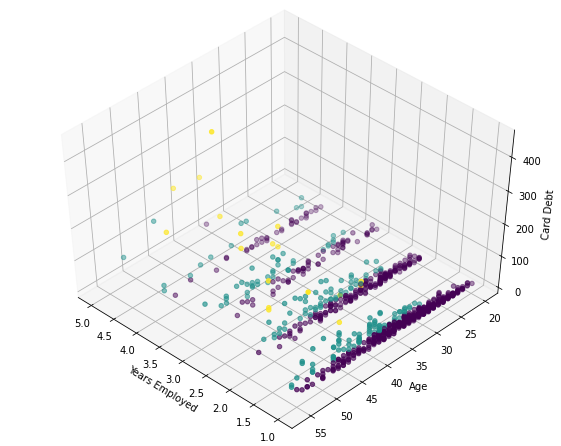

In [19]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig,rect=[0,0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Card Debt')
ax.scatter(X[:,1], X[:,0], X[:,3], c=labels.astype(np.float))
